# 卷积神经网络（Convolutional Neural Network，CNN）

## 1.基础知识

### 1.1 概述
卷积神经网络是深度学习在计算机视觉领域的突破性成果。在计算机视觉领域, 往往我们输入的图像都很大，使用全连接网络的话，计算的代价较高。另外图像也很难保留原有的特征，导致图像处理的准确率不高。

CNN 是含有卷积层的神经网络。卷积层的作用就是用来自动学习、提取图像的特征。

CNN 网络主要有三个部分：卷积层、池化层和全连接层。

- 卷积层：提取图像的局部特征。
- 池化层：对卷积层的输出进行下采样，大幅降低参数量级（降维），减少计算量。
- 全连接层：类似人工神经网络的部分，用来输出结果。

### 1.2 图像基础知识

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


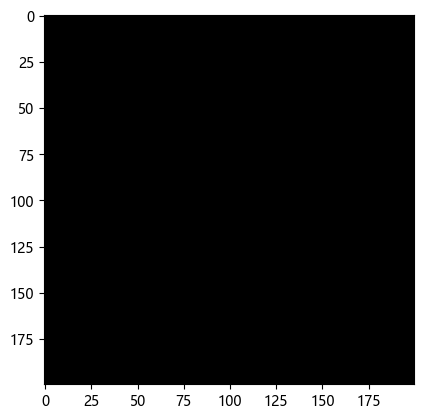

In [25]:
# 像素和通道
import numpy as np
import matplotlib.pyplot as plt

image = np.zeros([200, 200])
print(image)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


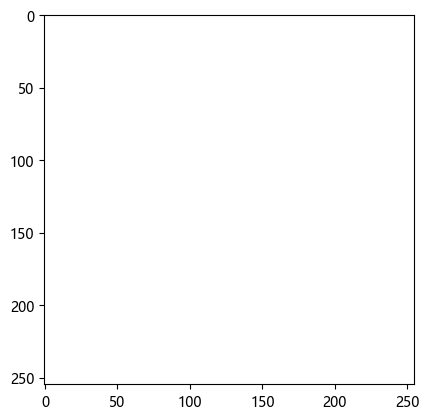

In [26]:
image = np.full([255, 255], 255)
print(image)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

[[0.8862745  0.8862745  0.8745098  ... 0.9019608  0.8666667  0.78431374]
 [0.8862745  0.8862745  0.8745098  ... 0.9019608  0.8666667  0.78431374]
 [0.8862745  0.8862745  0.8745098  ... 0.9019608  0.8666667  0.78431374]
 ...
 [0.32941177 0.32941177 0.36078432 ... 0.6784314  0.6745098  0.69411767]
 [0.32156864 0.32156864 0.3764706  ... 0.7019608  0.70980394 0.7254902 ]
 [0.32156864 0.32156864 0.3764706  ... 0.7019608  0.70980394 0.7254902 ]]


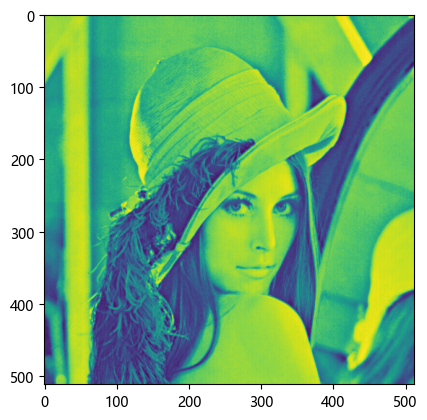

[[0.5372549  0.5372549  0.5372549  ... 0.5803922  0.50980395 0.3882353 ]
 [0.5372549  0.5372549  0.5372549  ... 0.5803922  0.50980395 0.3882353 ]
 [0.5372549  0.5372549  0.5372549  ... 0.5803922  0.50980395 0.3882353 ]
 ...
 [0.07058824 0.07058824 0.10588235 ... 0.28627452 0.26666668 0.24313726]
 [0.08627451 0.08627451 0.1254902  ... 0.27450982 0.2784314  0.2901961 ]
 [0.08627451 0.08627451 0.1254902  ... 0.27450982 0.2784314  0.2901961 ]]


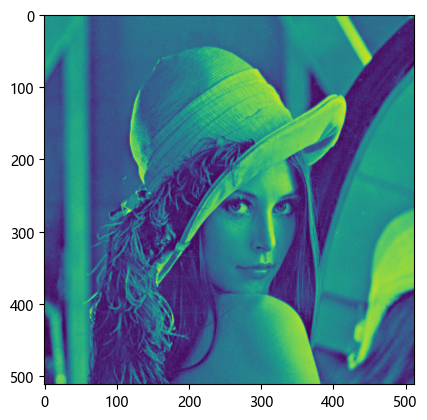

[[0.49019608 0.49019608 0.52156866 ... 0.47843137 0.43137255 0.3529412 ]
 [0.49019608 0.49019608 0.52156866 ... 0.47843137 0.43137255 0.3529412 ]
 [0.49019608 0.49019608 0.52156866 ... 0.47843137 0.43137255 0.3529412 ]
 ...
 [0.23529412 0.23529412 0.22745098 ... 0.32941177 0.29803923 0.30980393]
 [0.22352941 0.22352941 0.24313726 ... 0.30980393 0.31764707 0.31764707]
 [0.22352941 0.22352941 0.24313726 ... 0.30980393 0.31764707 0.31764707]]


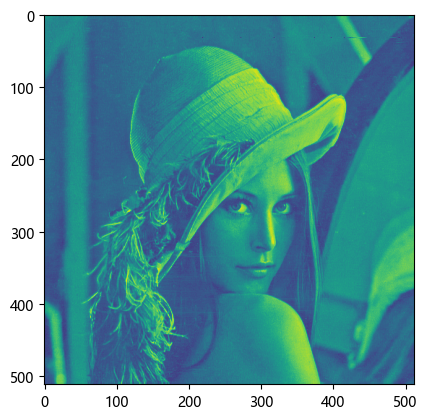

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


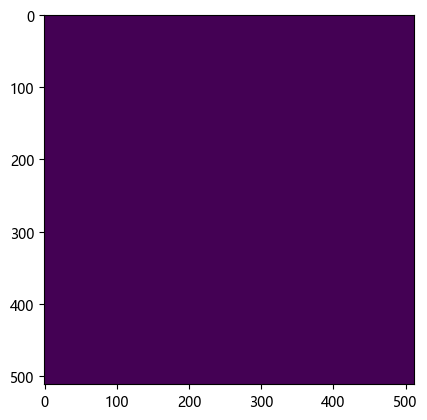

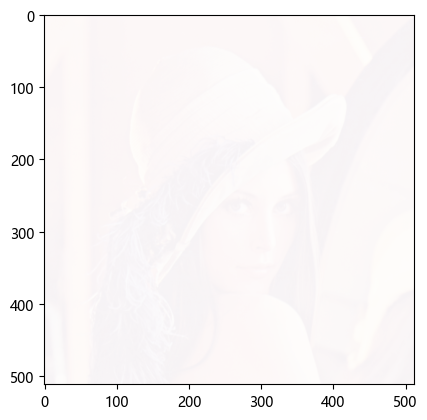

In [27]:
image = plt.imread('images/Lenna.png')
# 修改数据的维度
image = np.transpose(image, [2, 0, 1])
# 打印所有通道
for channel in image:
    print(channel)
    plt.imshow(channel)
    plt.show()
# 修改透明度
image[3] = 0.05
image = np.transpose(image, [1, 2, 0])
plt.imshow(image)
plt.show()

## 2.卷积层

### 2.1 卷积计算
<img src="images/kernel_def.png">

1. input: 输入图像
2. filter: 卷积核，也叫滤波器
3. output: 特征图

<img src="images/kernel_cal.png">

### 2.2 Padding
通过上面的卷积计算过程，我们发现最终的特征图比原始图像小很多，如果想要保持经过卷积后的图像大小不变, 可以在原图周围添加 padding 来实现.

<img src="images/padding.png">

### 2.3 Stride(步长)
如果把 Stride 增大为2，也可以提取特征：

<img src="images/stride.png">

### 2.4 多通道卷积计算
<img src="images/multi_channel.png">

1. 要求卷积核与输入图像的通道数相同
2. 每个卷积核通道与对应的输入图像通道进行卷积计算
3. 将每个通道的卷积结果按位相加得到最终的特征图

<img src="images/multi_channel_cal.png">

### 2.5 多卷积核卷积计算
多个卷积核可以理解为从不同的角度、不同的视角对图像提取特征。

<img src="images/multi_kernel.png">

### 2.6 特征图大小
记输入图像的大小为 $ W \times W $，卷积核大小为 $ F \times F $，Stride = $ S $，Padding = $ P $，则输出特征图的大小为： $$ N=\frac{W-F+2P}{S}+1 $$

### 2.7 具体案例

In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


def show_image(image):
    """
    :param image: (Height, Width, Channel)
    """
    plt.imshow(image)
    plt.axis('off')
    plt.show()

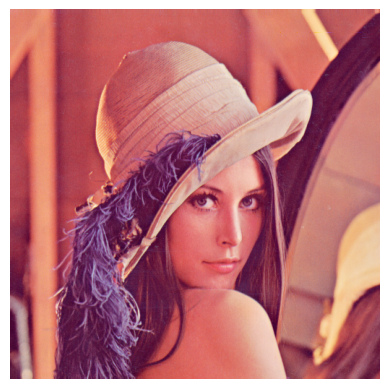

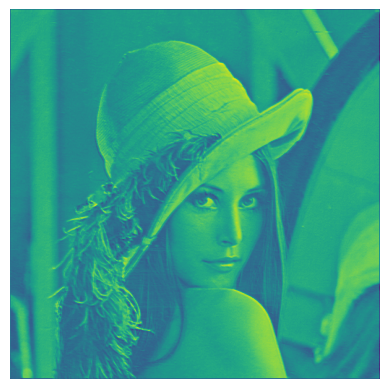

In [29]:
# 1. 单个多通道卷积层
# 读取图像
image = plt.imread('images/Lenna.png')          # (512, 512, 4)
show_image(image)
# 构建卷积层
conv = nn.Conv2d(in_channels=4, out_channels=1, kernel_size=3, stride=1, padding=1)
# 输入形状为 (Batch, Channel, Height, Width)
image = torch.tensor(image).permute(2, 0, 1)    # torch.Size([4, 512, 512])
image = image.unsqueeze(0)                      # torch.Size([1, 4, 512, 512])
# 输入卷积层
output = conv(image)                            # torch.Size([1, 1, 512, 512])
output = output.squeeze(0).permute(1, 2, 0)     # torch.Size([512, 512, 1])
show_image(output.detach().numpy())

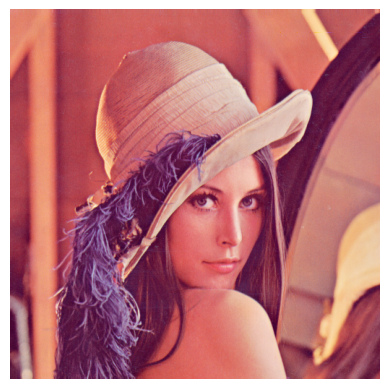

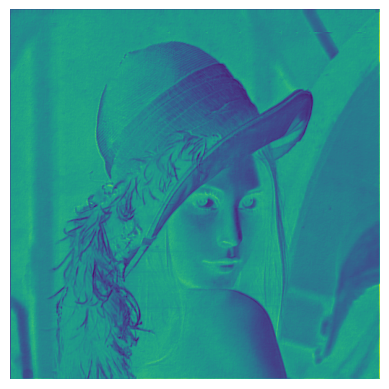

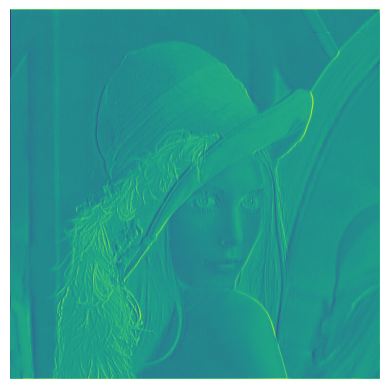

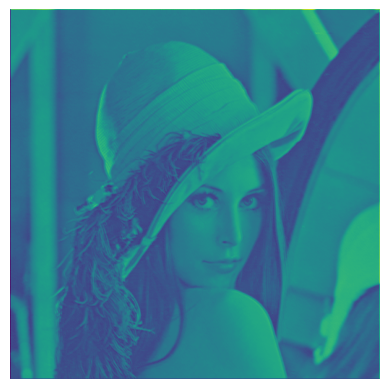

In [30]:
# 2. 多个多通道卷积核
# 读取图像
image = plt.imread('images/Lenna.png')          # (512, 512, 4)
show_image(image)
# 构建卷积层
conv = nn.Conv2d(in_channels=4, out_channels=3, kernel_size=3, stride=1, padding=1)
# 输入形状为 (Batch, Channel, Height, Width)
image = torch.tensor(image).permute(2, 0, 1)    # torch.Size([4, 512, 512])
image = image.unsqueeze(0)                      # torch.Size([1, 4, 512, 512])
# 输入卷积层
output = conv(image)                            # torch.Size([1, 3, 512, 512])
output = output.squeeze(0).permute(1, 2, 0)     # torch.Size([512, 512, 3])
show_image(output[:, :, 0].unsqueeze(2).detach().numpy())
show_image(output[:, :, 1].unsqueeze(2).detach().numpy())
show_image(output[:, :, 2].unsqueeze(2).detach().numpy())

## 3. 池化层
主要有两种：最大池化和平均池化。

### 3.1 池化层计算
<img src="images/pooling_cal.png">

In [31]:
inputs = torch.tensor([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]).float()
inputs = inputs.unsqueeze(0).unsqueeze(0)  # torch.Size([1, 1, 3, 3])
# 最大池化
pooling = nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
output = pooling(inputs)
print(output)  # torch.Size([1, 1, 2, 2])
# 平均池化
pooling = nn.AvgPool2d(kernel_size=2, stride=1, padding=0)
output = pooling(inputs)
print(output)  # torch.Size([1, 1, 2, 2])

tensor([[[[4., 5.],
          [7., 8.]]]])
tensor([[[[2., 3.],
          [5., 6.]]]])


### 3.2 Stride
<img src="images/pooling_stride.png">

In [32]:
inputs = torch.tensor([
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [8, 9, 10, 11],
    [12, 13, 14, 15]
]).float()
inputs = inputs.unsqueeze(0).unsqueeze(0)  # torch.Size([1, 1, 4, 4])
# 最大池化
pooling = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
output = pooling(inputs)
print(output)  # torch.Size([1, 1, 2, 2])
# 平均池化
pooling = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
output = pooling(inputs)
print(output)  # torch.Size([1, 1, 2, 2])

tensor([[[[ 5.,  7.],
          [13., 15.]]]])
tensor([[[[ 2.5000,  4.5000],
          [10.5000, 12.5000]]]])


### 3.3 Padding
<img src="images/pooling_padding.png">

In [33]:
inputs = torch.tensor([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]).float()
inputs = inputs.unsqueeze(0).unsqueeze(0)  # torch.Size([1, 1, 3, 3])
# 最大池化
pooling = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
output = pooling(inputs)
print(output)  # torch.Size([1, 1, 3, 3])
# 平均池化
pooling = nn.AvgPool2d(kernel_size=2, stride=1, padding=1)
output = pooling(inputs)
print(output)  # torch.Size([1, 1, 3, 3])

tensor([[[[0., 1., 2., 2.],
          [3., 4., 5., 5.],
          [6., 7., 8., 8.],
          [6., 7., 8., 8.]]]])
tensor([[[[0.0000, 0.2500, 0.7500, 0.5000],
          [0.7500, 2.0000, 3.0000, 1.7500],
          [2.2500, 5.0000, 6.0000, 3.2500],
          [1.5000, 3.2500, 3.7500, 2.0000]]]])


### 3.4 多通道池化计算
在处理多通道输入数据时，池化层对每个输入通道分别池化，而不是像卷积层那样将各个通道的输入相加。这意味着池化层的输出和输入的通道数是相等。

<img src="images/multi_channel_pooling.png">

In [34]:
inputs = torch.tensor([
    [[0, 1, 2], [3, 4, 5], [6, 7, 8]],
    [[10, 20, 30], [40, 50, 60], [70, 80, 90]],
    [[11, 22, 33], [44, 55, 66], [77, 88, 99]]
]).float()
inputs = inputs.unsqueeze(0)  # torch.Size([1, 3, 3, 3])
# 最大池化
pooling = nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
output = pooling(inputs)
print(output)  # torch.Size([1, 2, 2, 3])
# 平均池化
pooling = nn.AvgPool2d(kernel_size=2, stride=1, padding=0)
output = pooling(inputs)
print(output)  # torch.Size([1, 2, 2, 3])

tensor([[[[ 4.,  5.],
          [ 7.,  8.]],

         [[50., 60.],
          [80., 90.]],

         [[55., 66.],
          [88., 99.]]]])
tensor([[[[ 2.,  3.],
          [ 5.,  6.]],

         [[30., 40.],
          [60., 70.]],

         [[33., 44.],
          [66., 77.]]]])


## 4.案例：图像分类

### 4.1 CIFAR-10 数据集
60,000 张 32x32 像素的彩色图像，分为 10 个类别，50,000张用于训练，10,000 张用于测试，每个类别 6,000 张图像。


In [35]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Compose
from torch.utils.data import DataLoader

# 数据基本信息
train = CIFAR10(root='./data', train=True, transform=Compose([ToTensor()]), download=True)
test = CIFAR10(root='./data', train=False, transform=Compose([ToTensor()]), download=True)
print('训练集样本数：', len(train))
print('测试集样本数：', len(test))
print('数据集形状：', train[0][0].shape)
print('数据集类别：', train.class_to_idx)

# 定义数据加载器
dataloader = DataLoader(train, batch_size=8, shuffle=True)
for x, y in dataloader:
    print(x.shape)
    print(y)
    break

Files already downloaded and verified
Files already downloaded and verified
训练集样本数： 50000
测试集样本数： 10000
数据集形状： torch.Size([3, 32, 32])
数据集类别： {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
torch.Size([8, 3, 32, 32])
tensor([8, 6, 0, 0, 2, 5, 4, 3])


### 4.2 搭建图像分类网络
<img src="images/network.png">

1. 输入形状：32x32
2. 第一个卷积层：输入3个通道，输出6个通道，卷积核大小为3x3，步长为1，padding为1
3. 第一个池化层：输入30x30，输出15x15，池化核大小为2x2，步长为2
4. 第二个卷积层：输入6个通道，输出16个通道，卷积核大小为3x3，步长为1，padding为1
5. 第二个池化层：输入13x13，输出6x6，池化核大小为2x2，步长为2
6. 第一个全连接层：输入576维，输出120维
7. 第二个全连接层：输入120维，输出84维
8. 输出层：输入84维，输出10维

In [36]:
from torch.functional import F


class ImageClassification(nn.Module):
    def __init__(self):
        super(ImageClassification, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, stride=1, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 128, stride=1, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.linear1 = nn.Linear(128 * 6 * 6, 2048)
        self.linear2 = nn.Linear(2048, 2048)
        self.out = nn.Linear(2048, 10)
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1)
        x = F.relu(self.linear1(x))
        x = F.dropout(x, p=0.5)
        x = F.relu(self.linear2(x))
        x = F.dropout(x, p=0.5)
        return self.out(x)

### 4.3 训练模型

In [37]:
import time

def train():
    # 加载数据集，并转换为张量
    transform = Compose([ToTensor()])
    cifar10 = CIFAR10(root='./data', train=True, transform=transform, download=False)
    # 构建模型
    model = ImageClassification()
    # 构建损失函数
    criterion = nn.CrossEntropyLoss()
    # 构建优化方法
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    # 训练轮数
    epochs = 100
    
    for epoch in range(epochs):
        # 构建数据加载器
        dataloader = DataLoader(cifar10, batch_size=128, shuffle=True)
        # 样本数量
        sample_num = 0
        # 总损失
        total_loss = 0
        # 开始时间
        start_time = time.time()
        correct = 0
        # 训练过程
        for x, y in dataloader:
            # 输入数据
            output = model(x)
            # 计算损失
            loss = criterion(output, y)
            # 梯度清零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 更新参数
            optimizer.step()
            
            correct += (torch.argmax(output, dim=-1) == y).sum()
            total_loss += (loss.item() * len(y))
            sample_num += len(y)
            
        print(f'epoch:{epoch + 1} loss:{total_loss / sample_num} acc:{correct / sample_num} time:{time.time() - start_time}')
    # 保存模型
    torch.save(model.state_dict(), 'models/image_classification.bin')

### 4.4 测试模型

In [38]:
def test():
    # 加载数据集，并转换为张量
    transform = Compose([ToTensor()])
    cifar10 = CIFAR10(root='./data', train=False, transform=transform, download=False)
    # 构建数据加载器
    dataloader = DataLoader(cifar10, batch_size=128, shuffle=True)
    # 加载模型
    model = ImageClassification()
    model.load_state_dict(torch.load('models/image_classification.bin'))
    model.eval()
    
    total_correct = 0
    total_samples = 0
    for x, y in dataloader:
        output = model(x)
        total_correct += (torch.argmax(output, dim=-1) == y).sum()
        total_samples += len(y)
        
    print(f'测试集准确率：{total_correct / total_samples}')

In [39]:
train()
test()

epoch:1 loss:1.8146004262161255 acc:0.3280999958515167 time:61.039766788482666
epoch:2 loss:1.459006884613037 acc:0.467960000038147 time:60.87378549575806
epoch:3 loss:1.3187337583160401 acc:0.5219600200653076 time:61.38414263725281
epoch:4 loss:1.2187156692504884 acc:0.5615000128746033 time:61.45607328414917
epoch:5 loss:1.1424864179611207 acc:0.5919600129127502 time:61.6685311794281
epoch:6 loss:1.0739935377883911 acc:0.6166800260543823 time:61.816563844680786
epoch:7 loss:1.012569392223358 acc:0.639519989490509 time:62.13238453865051
epoch:8 loss:0.9621736268997192 acc:0.659500002861023 time:61.7626748085022
epoch:9 loss:0.9110667845535279 acc:0.6784999966621399 time:61.77491211891174
epoch:10 loss:0.859642571220398 acc:0.6975200176239014 time:62.36313796043396
epoch:11 loss:0.8205015105056763 acc:0.7116600275039673 time:61.64608693122864
epoch:12 loss:0.7800693182754517 acc:0.7260000109672546 time:61.72485160827637
epoch:13 loss:0.7343713549804688 acc:0.7440400123596191 time:61.610